In [2]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt


In [12]:

image = Image.open("1.jpeg")
# Convert the image to grayscale
image = image.convert("L")

 

# Binarize the image
threshold = 100
img = image.point(lambda p: p > threshold and 255)
print(np.array(image) )
template = np.ones((5,5),np.uint8)

[[201 201 201 ... 200 200 200]
 [201 201 200 ... 200 200 200]
 [200 200 199 ... 200 200 200]
 ...
 [180 179 179 ... 184 182 182]
 [180 179 179 ... 170 169 169]
 [180 179 179 ... 158 157 157]]


In [13]:
# -- Dillation of the Image 
dilation = cv2.dilate(np.array(img),template,iterations = 1)

# -- Erosion of the Image 
erosion = cv2.erode(np.array(img),template,iterations = 1)

# -- Boundary Extraction
dif = np.array(img) - erosion

# -- Opening of the Image
opening = cv2.morphologyEx(np.array(img), cv2.MORPH_OPEN, template)

# -- Closing of the Image
closing = cv2.morphologyEx(np.array(img), cv2.MORPH_CLOSE, template)

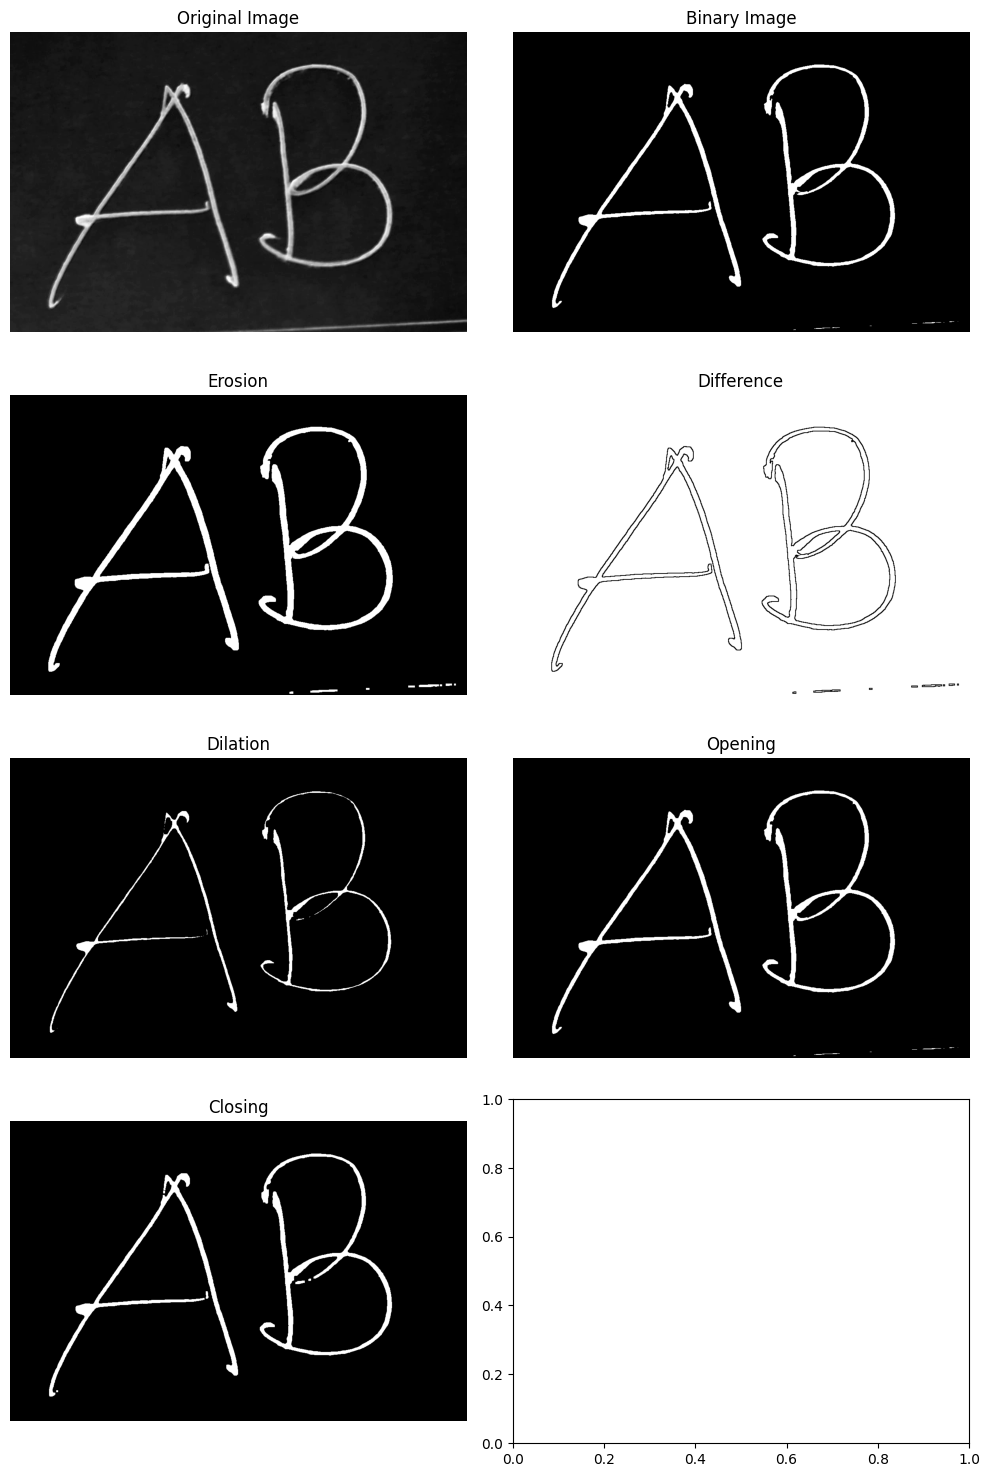

In [19]:
# plt.figure()
# plt.imshow(image)
# plt.axis('off')

 

# plt.figure()
# plt.imshow(img, cmap='binary')
# plt.axis('off')

 

# plt.figure()
# plt.imshow(erosion, cmap='binary')
# plt.axis('off')

 

# plt.figure()
# plt.imshow(dif, cmap='binary')
# plt.axis('off')

 

# plt.figure()
# plt.imshow(dilation, cmap='binary')
# plt.axis('off')

 

# plt.figure()
# plt.imshow(opening, cmap='binary')
# plt.axis('off')

 

# plt.figure()
# plt.imshow(closing, cmap='binary')
# plt.axis('off')

 

# plt.show()

# # Define subplots
# fig, axs = plt.subplots(4, 2, figsize=(10, 15))

# # Plot images on subplots
# axs[0, 0].imshow(image)
# axs[0, 0].axis('off')
# axs[0, 0].set_title('Original Image')

# axs[0, 1].imshow(img, cmap='binary')
# axs[0, 1].axis('off')
# axs[0, 1].set_title('Binary Image')

# axs[1, 0].imshow(erosion, cmap='binary')
# axs[1, 0].axis('off')
# axs[1, 0].set_title('Erosion')

# axs[1, 1].imshow(dif, cmap='binary')
# axs[1, 1].axis('off')
# axs[1, 1].set_title('Difference')

# axs[2, 0].imshow(dilation, cmap='binary')
# axs[2, 0].axis('off')
# axs[2, 0].set_title('Dilation')

# axs[2, 1].imshow(opening, cmap='binary')
# axs[2, 1].axis('off')
# axs[2, 1].set_title('Opening')

# axs[3, 0].imshow(closing, cmap='binary')
# axs[3, 0].axis('off')
# axs[3, 0].set_title('Closing')

# # Hide empty subplot
# axs[3, 1].axis('off')

# # Adjust layout
# plt.tight_layout()

# # Show plot
# plt.show()


def plot_images(images, titles=None, ncols=2, figsize=(10, 15), cmap='binary'):
    nrows = -(-len(images) // ncols)  # Ceiling division to determine number of rows
    
    fig, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flat  # Convert 2D array of axes to 1D
    
    for ax, image, title in zip(axs, images, titles):
        ax.imshow(image, cmap=cmap)
        ax.axis('off')
        ax.set_title(title)

    # # Hide empty subplots
    # for ax in axs[len(images):]:
    #     ax.axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
images = [image, img, erosion, dif, dilation, opening, closing]
titles = ['Original Image', 'Binary Image', 'Erosion', 'Difference', 'Dilation', 'Opening', 'Closing']

plot_images(images, titles)

